MATH 317 Lab Assignment 1  
October 5, 2023  
Thomas Cole, 260904382  

In [1]:
import pandas as pd
import numpy as np
import math as math
import matplotlib.pyplot as plt

### **Part 1**)

#### **1**)

In [2]:
"""
Note: Both of these function have been modified to take a parameter n as input. This will be helpful
for further parts of the question.
"""
def naivelog(x,n = 15):
  y = x
  for i in range(n):
    y = math.sqrt(y)

  l = y-1
  for i in range(n):
    l = l*2
  return l

def mylog(x,n = 15):
  z = x-1
  for i in range(n):
    z = z/(1+math.sqrt(1+z))
    
  l = z
  for i in range(n):
    l = l*2
  return l

**naivelog**

The first function, naive log- calculates the logarithm using an argument halving philosophy. First we use the property that log(1+y) ~ y for small values of y. Then, log(x) ~ 2^n*(y-1). Thus, in the first for loop of this algorithm, we repeatedly take the square root of x at a given precision n (n = 15) (2^n) times .Afterwards, we remove the 1 originally added by letting l = y -1, and then double result n (n = 15) times to arrive at the desired result, that is; log(x) ~ 2^n*(y-1), where y = 2^n root(x). The issue with this, is for values close to 1, we will get cancellation of digits. This is not ideal- so we resort to mylog.

**mylog**

The second function, as mentioned previously, is a "way out" of the problem of cancellation of digits that we occured in the first computation. To do this, we instead let x = 1 + z, or z = x - 1. Using conguation of the same formula we were applying in naivelog, we can apply a new formula, as written in the first loop to repeadetly calculate z, (n times). Lastly, once z is small, we simply have that 
log(x) = 2^n*z. This is precisely computed by the second for loop. 

The formula used in the first loop here is important, as we are dealing with addition instead of subtraction, which means we can avoid the cancellation of digits error that we encounter with naivelog. This will be shown in further detail in the next question.

#### **2**)

#### **Naive Log**

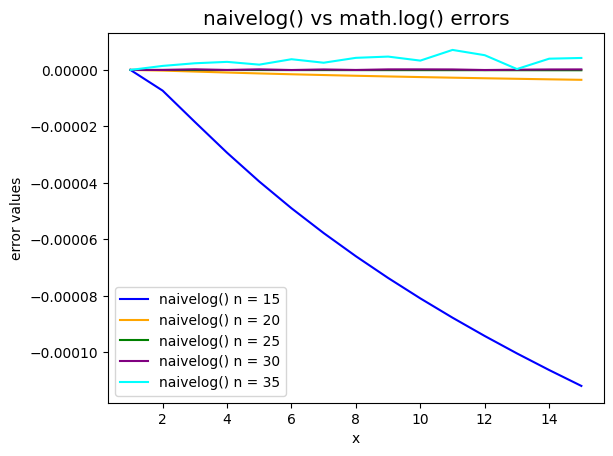

In [3]:
# get x values and computer errors
xlist = np.linspace(1,15,num = 15)
error_list_nlog15 = [(math.log(x) - naivelog(x, n = 15)) for x in xlist]
error_list_nlog20 = [(math.log(x) - naivelog(x, n = 20)) for x in xlist]
error_list_nlog25 = [(math.log(x) - naivelog(x, n = 25)) for x in xlist]
error_list_nlog30 = [(math.log(x) - naivelog(x, n = 30)) for x in xlist]
error_list_nlog35 = [(math.log(x) - naivelog(x, n = 35)) for x in xlist]

plt.plot(xlist,error_list_nlog15, color = "blue", label = "naivelog() n = 15")
plt.plot(xlist,error_list_nlog20, color = "orange", label = "naivelog() n = 20")
plt.plot(xlist,error_list_nlog25, color = "green", label = "naivelog() n = 25")
plt.plot(xlist,error_list_nlog30, color = "purple", label = "naivelog() n = 30")
plt.plot(xlist,error_list_nlog35, color = "cyan", label = "naivelog() n = 35")
leg = plt.legend()
plt.style.use('ggplot')
plt.xlabel("x")
plt.ylabel("error values")
plt.title("naivelog() vs math.log() errors")
plt.show()

#### **MyLog**

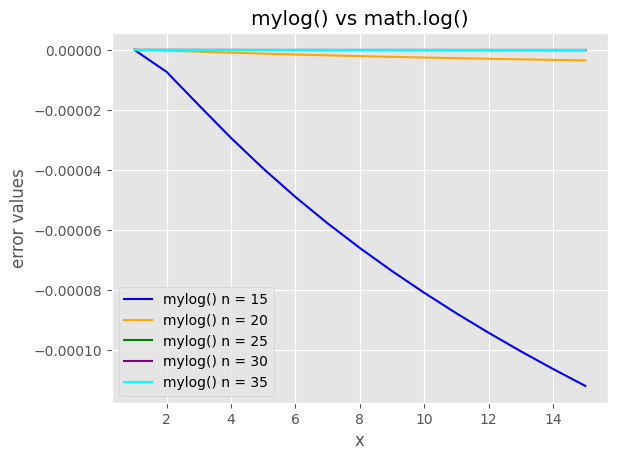

In [4]:
xlist = np.linspace(1,15,num = 15)
error_list_mlog15 = [(math.log(x) - mylog(x, n = 15)) for x in xlist]
error_list_mlog20 = [(math.log(x) - mylog(x, n = 20)) for x in xlist]
error_list_mlog25 = [(math.log(x) - mylog(x, n = 25)) for x in xlist]
error_list_mlog30 = [(math.log(x) - mylog(x, n = 30)) for x in xlist]
error_list_mlog35 = [(math.log(x) - mylog(x, n = 35)) for x in xlist]

plt.plot(xlist,error_list_mlog15, color = "blue", label = "mylog() n = 15")
plt.plot(xlist,error_list_mlog20, color = "orange", label = "mylog() n = 20")
plt.plot(xlist,error_list_mlog25, color = "green", label = "mylog() n = 25")
plt.plot(xlist,error_list_mlog30, color = "purple", label = "mylog() n = 30")
plt.plot(xlist,error_list_mlog35, color = "cyan", label = "mylog() n = 35")
leg = plt.legend()
plt.style.use('ggplot')
plt.xlabel("x")
plt.ylabel("error values")
plt.title("mylog() vs math.log()")
plt.show()

We can see based on these graphs a few key distinctions between naivelog and mylog.

Firstly, we can see that for low values of, n = 15, both functions have siginficant errors from math.log(), and these errors increase as the value of our x increases. This should be expected based on the analysis that we performed in class on these algorithms. 

Secondly, we might notice that for n = 35, naivelog() has more error than does mylog(). Specficially, naivelog() is inconsistent whereas mylog() behaves fairly linearly with n = 35. 

Lastly, we might also note that n = 20, behaves similiarily with respect to error for both mylog() and naivelog()- but there is still error present. In both alogirhtms, the best performing values of n seems to be n = 25 and n = 30. 

As depicted in the graphs, these errors are the result of the relative error that is provided by each algorithm, which we have examined extensively in lectures.

#### **3**)

#### **Exponential**

In [5]:
def exp(x):
    k = 16
    N = 2**(k)
    y = x / N
    z = 1 + y

    for i in range(k):
        z = (z)**2
    return z

**Sample Values**

In [6]:
print("e^0 = ", exp(0))
print("e^1 = ", exp(1))
print("e^2 = ", exp(2))

e^0 =  1.0
e^1 =  2.71826108990388
e^2 =  7.388830610860716


To calculate the exponential function, first we make x very small. For small values of x, e^x ~ (1+ y)^N, where N = 2^k for some value of k and y = x/N. Here I have chosen k = 16. Once we have this intial value computed, we simply square z = 1 + y, k times. This will produce our desired result of e^x as we have proved in class. The graph below compares my function to the true e^x. We can see that it performs fairly well. Please see the graph below.

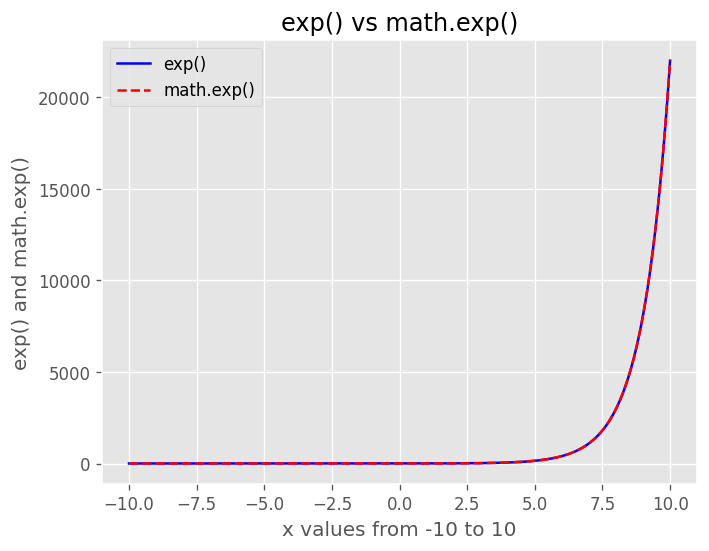

In [7]:
# generate x and y values for each
xlist = np.linspace(-10,10,num = 1000)
ylist_exp = exp(xlist)
ylist_math_exp = [math.exp(x) for x in xlist]

# plot graph
plt.figure(num = 0,dpi = 120)
plt.plot(xlist,ylist_exp, color = "blue", label = "exp()")
plt.plot(xlist,ylist_math_exp,color = "red", label = "math.exp()", linestyle = "dashed")
leg = plt.legend()
plt.style.use('ggplot')
plt.xlabel("x values from -10 to 10")
plt.ylabel("exp() and math.exp()")
plt.title("exp() vs math.exp()")
plt.show()

#### **Sine**

In [8]:
def sine(x):
    k = 16
    y = x / 2**k
    z = y
    for i in range(k):
        z = 2*z*math.sqrt(1- z**2)

    return z

**Sample Values**

In [9]:
print('sine(0) = ',sine(0))
print('sine(pi/2)= ', sine(np.pi/2))

sine(0) =  0.0
sine(pi/2)=  1.0


Much like in the exponential function, to calculate sin(x), we first want to make our value of x small. When x is small, sin(y) ~ y. That is, we let y = x / N, where N = 2^k for some value of k, again I have chosen k = 16. Once we have this formula, we let z = y, and then apply the double angle formula for sin(x) which we have covered in the lectures. We can see that this performs fairly well when compared to the true graph of sin(x). Please see the graph below. 

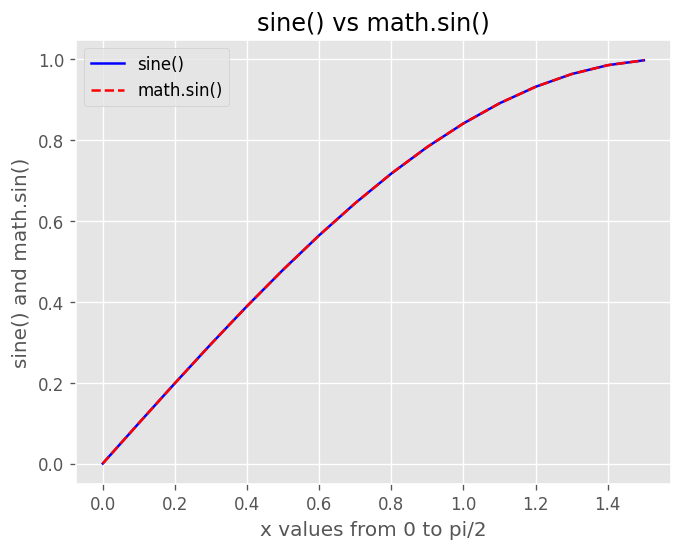

In [10]:
# generate x and y values
xlist = np.arange(0,np.pi/2,0.1) 
ylist_sine = [sine(x) for x in xlist]
ylist_math_sine = [math.sin(x) for x in xlist]

# plot graph
plt.figure(num = 0,dpi = 120)
plt.plot(xlist,ylist_sine, color = "blue", label = "sine()")
plt.plot(xlist,ylist_math_sine,color = "red", label = "math.sin()", linestyle = "dashed")
leg = plt.legend()
plt.xlabel("x values from 0 to pi/2")
plt.ylabel("sine() and math.sin()")
plt.title("sine() vs math.sin()")
plt.style.use('ggplot')
plt.show()

#### **Cosine**

In [11]:
def cosine(x):
    k = 16
    y = x / 2**k
    z = 1 - (y**2/2)
    for i in range(k):
        z = 2*z**2 - 1
    return z

**Sample Values**

In [12]:
print("cosine(0) = ",cosine(0))
print('cosine(pi/2) = ', cosine(np.pi/2))

cosine(0) =  1.0
cosine(pi/2) =  -1.310607042892542e-07


Again, our first goal is to make our value of x small. That is, so we can exploit that for small values of x, cos(x) ~ 1 - x^2/2. Again, we let y = x / N, where N = 2^k, k = 16 as before. Once we have this, we let z = 1 - y^2/2 and then apply the double angle formula for cos(x), covered in lectures, to arrive at our desired value. Again, we can see that this performs reasonably well with respect to the true graph of cos(x). Please see the graph below.

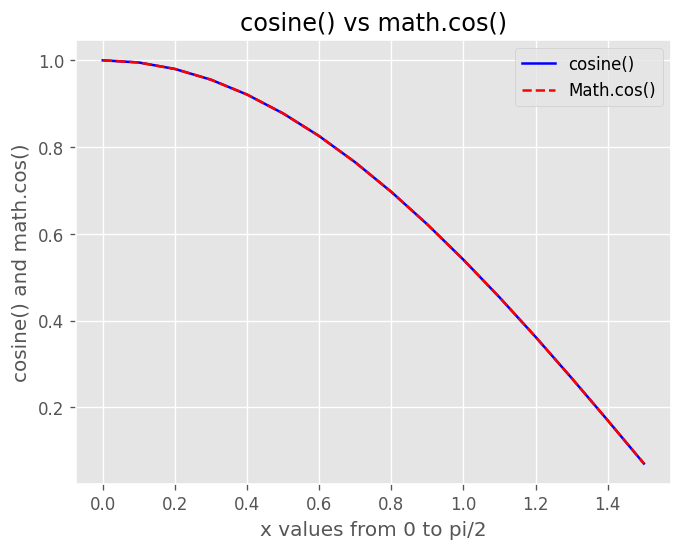

In [13]:
# generate x and y values
xlist = np.arange(0,np.pi/2,0.1) 
ylist_cosine = [cosine(x) for x in xlist]
ylist_math_cosine = [math.cos(x) for x in xlist]

# plot graph
plt.figure(num = 0,dpi = 120)
plt.plot(xlist,ylist_cosine, color = "blue", label = "cosine()")
plt.plot(xlist,ylist_math_cosine,color = "red", label = "Math.cos()", linestyle = "dashed")
leg = plt.legend()
plt.xlabel("x values from 0 to pi/2")
plt.ylabel("cosine() and math.cos()")
plt.title("cosine() vs math.cos()")
plt.style.use('ggplot')
plt.show()

#### **4**)

#### **Arctangent**

In [14]:
def arctan(x):

    k = 16
    z = x 
    for i in range(k):
        z = (-1 + math.sqrt(1+z**2))/z

    l = z
    for i in range(k):
        l = l*2

    return l

**Sample Values**

In [15]:
print("arctan(1) = ",arctan(1))
print("arctan(100000000) (+inf) = ", arctan(100000000))

arctan(1) =  0.7853977173947788
arctan(100000000) (+inf) =  1.5707963275410315


Finally, we apply a similar procedure for arctan(x) as we did for log(x). First, we use the arctan(x) doubling formula to reduce the value of z, this formula was also shown in lectures. We do this k = 16 times. Then once we have the value of z significantly reduced, we can apply the property arctan(x) ~ x for small values of x. Then we double the result to get the corresponding value of theta. As with the previous functions, arctan also performs reasonably well. Please see the graph below.

C:\Users\thoma\AppData\Local\Temp\ipykernel_9940\4195619001.py:6: RuntimeWarning: invalid value encountered in scalar divide
  z = (-1 + math.sqrt(1+z**2))/z


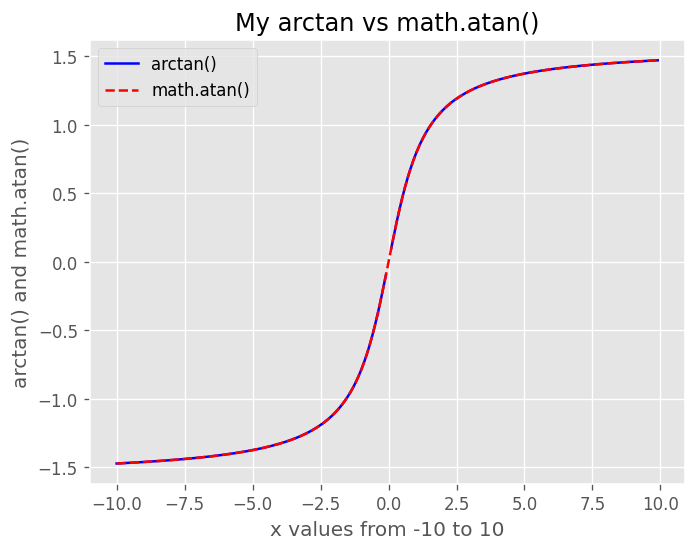

In [16]:
# generate x and y values
xlist = np.arange(-10,10,0.1) 
ylist_arctan = [arctan(x) for x in xlist]
ylist_math_arctan = [math.atan(x) for x in xlist]

# plot graph
plt.figure(num = 0,dpi = 120)
plt.plot(xlist,ylist_arctan, color = "blue", label = "arctan()")
plt.plot(xlist,ylist_math_arctan,color = "red", label = "math.atan()", linestyle = "dashed")
leg = plt.legend()
plt.style.use('ggplot')
plt.xlabel("x values from -10 to 10")
plt.ylabel("arctan() and math.atan()")
plt.title("My arctan vs math.atan()")
plt.show()

#### **Computing pi**

In [17]:
# we know arctan(1) = pi/4
pi_4 = arctan(1)

# multiple by 4
pi_4 * 4

3.1415908695791153

We can compute pi by using the fact that arctan(1) = pi/4. Then if we multiply by 4, we can get our approximation to the value of pi, which is fairly accurate.

### **Part 2**)

#### **1**) 

In [18]:
# create lookup dictionary using previous arctangent function.
lookup = {str(value): arctan(2**-value) for value in list(range(10))}

#### **Cordic tangent**

In [19]:
def cordic_tan(theta):
    # argument reduction, for angles greater than pi/2

    # tangent is pi periodic, subtract off as many pi as we can.
    if (theta > arctan(1)*2):
        n = theta // (arctan(1)*4)
        theta = theta - n*(arctan(1)*4)
        
    # handle negative values
    sign = 1
    if (theta < 0):
        theta = abs(theta)
        sign = -1
    
    # intialize values for pseodo quotient
    iterations = {'0':0, '1': 0, '2': 0, '3': 0,'4':0,'5':0,'6':0,'7':0,'8':0,'9':0}
    current_value = theta

    # set boundary to stop computation
    epsilon = 10**-10

    # perform pseudo division, to find number of rotations available for each.
    for key in iterations:
        while  (current_value > epsilon) & (int(key) < 10):
            if (current_value- lookup[str(key)]) >= 0:
                
                # update theta
                current_value = current_value - lookup[str(key)]

                # update iterations dictionary
                iterations[str(key)] += 1
            else:
                break

    # intialize values.
    curr_x = 0.607 # starting value, determined as cordic coefficient for base 2.
    curr_y = 0
    curr_z = theta 
    d = 1

    # perform pseudo multiplication to recover values of x and y.
    for key in iterations:
        for i in range(iterations[key]):
            
            if (curr_z < 0):
                d = -1
            else:
                d = 1
            
            # update x,y,z
            next_x = curr_x - curr_y*d*2**-int(key)
            next_y = curr_y + curr_x*d*2**-int(key)
            next_z = curr_z - d*lookup[str(key)]

            curr_x = next_x
            curr_y = next_y
            curr_z = next_z

    return curr_y/curr_x

**Sample Values**

In [20]:
print("cordic_tan(pi/4) = ", cordic_tan(np.pi/4))
print('cordic_tan(pi/3) = ', cordic_tan(np.pi/3))
print('cordic_tan(pi/6) = ', cordic_tan(np.pi/6))

cordic_tan(pi/4) =  1.0
cordic_tan(pi/3) =  1.7272727272727273
cordic_tan(pi/6) =  0.5755263319053876


First we do argument reduction for values greater than pi/2 and negative values. We use the fact that tan(-x) = -tan(x) and also the property that tan(x) has period pi. That means, tan(x + n*pi) = tan(x), for some integer n.

Once we have reduced the argument to between 0 and pi/2, first we need to create a lookup table to store pre-computed values of arctan(x) that we will use within this computation. I have selected to use base 2, to resolve issues related to accuarcy.

To start the computation, we need to iterate through the dictionary of pre-computed values to find the pseudo quotient of our original angle. That is, we re-write theta as a sum of the pre-computed values, from our lookup dictionary. This happens in the first for-loop. We store these values in the "iterations" dictionary.

Next, once we have our pseudo quotient, we can begin to calculate tan(x). We start by intializing values of x,y,z. Where x = 0.607 (a predetermined constant as given in readings), y = 0, and z = theta. Once we have these, we iterate over our "iterations" dictionary and apply the formulas the amount of times as determiend by our pseudo qoutient, while updating x,y,z. The result of these repeated computations is x = cos(theta), y = sin(theta). Thus, y/x = tan(theta) which is the value we wanted- so we return this.

Please see the graph below for a comparison of my function, cordic_tan() and math.tan().

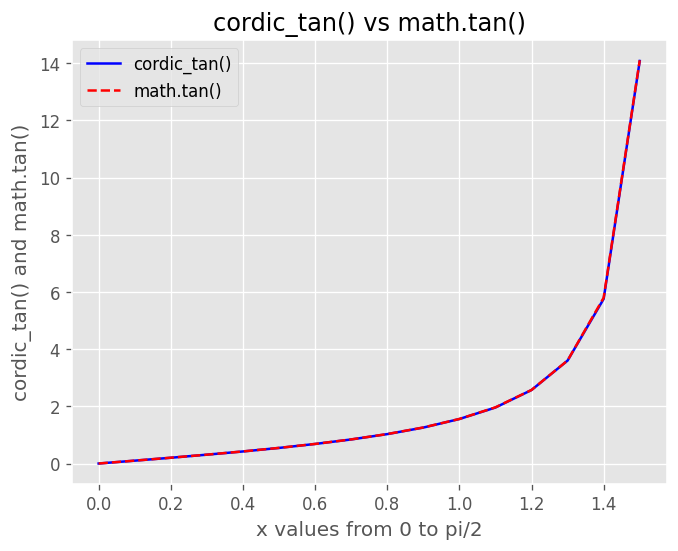

In [21]:
# generate x and y values
xlist = np.arange(0,np.pi/2,0.1) 
ylist_cordic_tan = [cordic_tan(x) for x in xlist]
ylist_math_tan= [math.tan(x) for x in xlist]

# plot graph
plt.figure(num = 0,dpi = 120)
plt.plot(xlist,ylist_cordic_tan, color = "blue", label = "cordic_tan()")
plt.plot(xlist,ylist_math_tan,color = "red", label = "math.tan()", linestyle = "dashed")
leg = plt.legend()
plt.style.use('ggplot')
plt.xlabel("x values from 0 to pi/2")
plt.ylabel("cordic_tan() and math.tan()")
plt.title("cordic_tan() vs math.tan()")
plt.show()

#### **2**)

#### **Cordic Sine**

In [22]:
def cordic_sine(theta):
    
    # calculate tangent theta
    tan_theta = cordic_tan(theta)

    # apply trigonometric identity
    sin_theta = tan_theta  / math.sqrt(1 + tan_theta**2)
    return sin_theta

**Sample Values**

In [23]:
print('cordic_sine(0) = ',cordic_sine(0))
print('cordic_sine(pi/3) = ', cordic_sine(np.pi/3))
print('cordic_sine(pi/4) = ',cordic_sine(np.pi/4))

cordic_sine(0) =  0.0
cordic_sine(pi/3) =  0.8654262854811262
cordic_sine(pi/4) =  0.7071067811865475


Since we have already calcualted tan(theta) for every given value of theta, we can simply use a trigonometric identity to arrive at a value for sin(theta). The identity is employed here. Please see the graph below for a comparison of my function, cordic_sine() and math.sin().

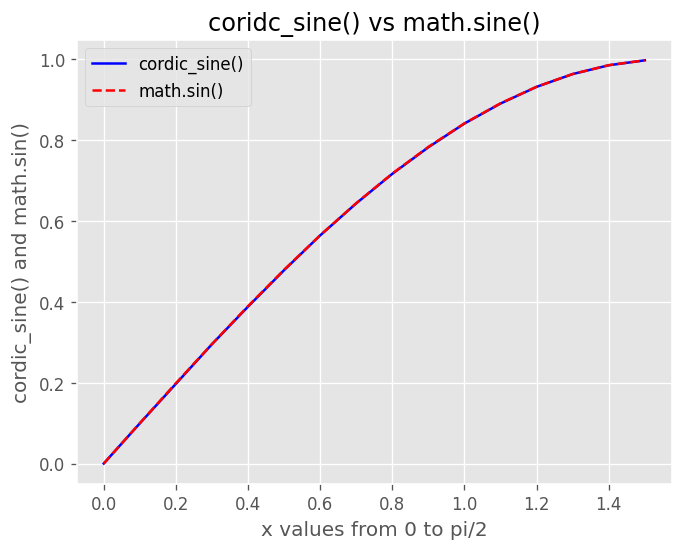

In [24]:
# generate x and y values
xlist = np.arange(0,np.pi/2,0.1) 
ylist_cordic_sine = [cordic_sine(x) for x in xlist]
ylist_math_sine = [math.sin(x) for x in xlist]

# plot graph
plt.figure(num = 0,dpi = 120)
plt.plot(xlist,ylist_cordic_sine, color = "blue", label = "cordic_sine()")
plt.plot(xlist,ylist_math_sine,color = "red", label = "math.sin()", linestyle = "dashed")
leg = plt.legend()
plt.style.use('ggplot')
plt.xlabel("x values from 0 to pi/2")
plt.ylabel("cordic_sine() and math.sin()")
plt.title("coridc_sine() vs math.sine()")
plt.show()

#### **Cordic Cosine**

In [25]:
def cordic_cosine(theta):

    # calcualte co-tangent of theta
    cot_theta = 1 / cordic_tan(theta)

    # apply trigonometric identity
    cos_theta = cot_theta / math.sqrt(1 + cot_theta**2)

    return cos_theta

**Sample Values**

In [26]:
print('cordic_cosine(pi/3) = ', cordic_cosine(np.pi/3))
print("cordic_cosine(pi/4) = ",cordic_cosine(np.pi/4))
print('cordic_cosine(pi/6) = ', cordic_cosine(np.pi/6))

cordic_cosine(pi/3) =  0.5010362705417046
cordic_cosine(pi/4) =  0.7071067811865475
cordic_cosine(pi/6) =  0.8667091086730153


Much like we did with sine(theta),since we have already calcualted tan(theta) for every given value of theta, we can simply use a trigonometric identity to arrive at a value for cos(theta). This identity uses a similar equality but with cotan(theta), instead. This is fairly easy since cot(theta) = 1 / tan(theta). The identity is employed here. Please see the graph below for a comparison of my function and math.cos().

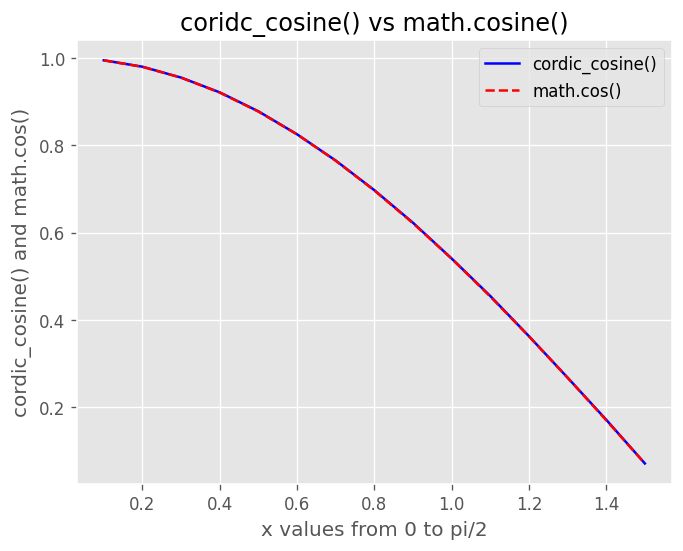

In [27]:
# generate x and y values
xlist = np.arange(0.1,np.pi/2,0.1) 
ylist_cordic_cosine = [cordic_cosine(x) for x in xlist]
ylist_math_cosine = [math.cos(x) for x in xlist]

# plot graph
plt.figure(num = 0,dpi = 120)
plt.plot(xlist,ylist_cordic_cosine, color = "blue", label = "cordic_cosine()")
plt.plot(xlist,ylist_math_cosine,color = "red", label = "math.cos()", linestyle = "dashed")
leg = plt.legend()
plt.style.use('ggplot')
plt.xlabel("x values from 0 to pi/2")
plt.ylabel("cordic_cosine() and math.cos()")
plt.title("coridc_cosine() vs math.cosine()")
plt.show()

#### **3**)

#### **Cordic arctan**

In [28]:
def cordic_arctan(A):

    # handle signs
    sign = 1
    if A < 0:
        sign = -1
    
    # intialize values
    curr_x = 1
    curr_y = abs(A)
    curr_z = 0
    d = 1
    iterations = {'0':0, '1': 0, '2': 0, '3': 0,'4':0,'5':0,'6':0,'7':0,'8':0,'9':0}


    # vector rotation
    for key in iterations:

        # apply formula to generate next value
        while (curr_y - d*curr_x*2**-int(key) >= 0):

            # update x,y,z
            next_x = curr_x + d*curr_y*2**-int(key)
            next_y = curr_y - d*curr_x*2**-int(key)
            next_z = curr_z + d*lookup[str(key)]

            curr_x = next_x
            curr_y = next_y
            curr_z = next_z
            
            # update pos/neg
            if (curr_y < 0):
                d = -1
            else:
                d = 1

    return curr_z*sign

**Sample Values**

In [29]:
print("cordic_arctan(1) = ",cordic_arctan(1))
print("cordic_arctan(100000000) (+inf) = ", cordic_arctan(100000000))

cordic_arctan(1) =  0.7853977173947788
cordic_arctan(100000000) (+inf) =  1.570010490562462


As with our approach for the cordic algorithm for tan(x), we first handle the argument reduction. To do this, if A is negative, we store the sign and compute as if it was positive. We then restore that value later. This uses the identity arctan(-A) = -arctan(A). 

To compute arctan(A), we proceed in a direction similar but opposite to that of computer tan(x). We start by intializing a vector, x,y,z with default values x = 1, y = abs(A), z = 0. Our goal will be to rotate this vector until y = 0. Then, if we sum the angles needed to arrive at that we will necessarily have arctan(A). 

Again, we are going to be using an "iterations" dictionary and also a pre-computed lookup table. For each value in the iterations dictionary, we see apply the transformations as many times as we can. If the current transformation is too large, we moved to a smaller pre-computed value. After applying these formulas, repeatedly our final values are such that, y = 0 and z = arctan(A). We return z, and multiply by the sign, calculated during argument reduction,to account for the possibility of negative values.

Intuitvely, this alogrithm makes sense- we rotate the vector by a translatoin for a pre-computed  degree and then sum these angles together to arrive at our final value.

Please see the graph below for a comparison my function, cordic_arctan() and math.atan().

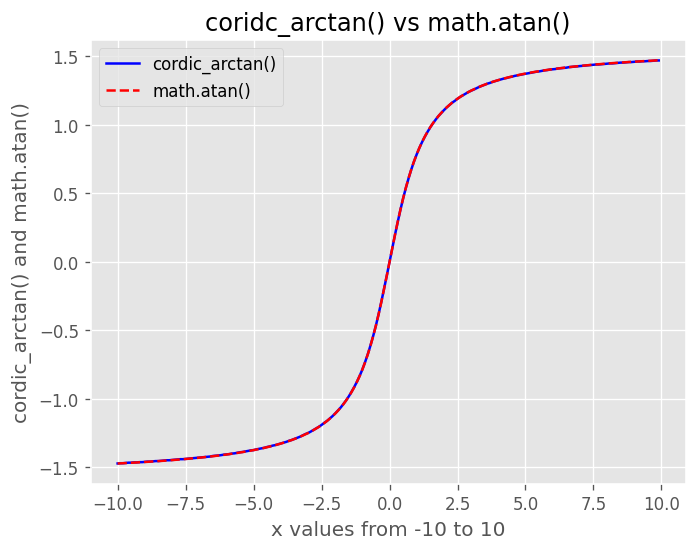

In [30]:
# generate x and y values
xlist = np.arange(-10,10,0.1) 
ylist_cordic_arctan = [cordic_arctan(x) for x in xlist]
ylist_math_arctan = [math.atan(x) for x in xlist]

# plot graph
plt.figure(num = 0,dpi = 120)
plt.plot(xlist,ylist_cordic_arctan, color = "blue", label = "cordic_arctan()")
plt.plot(xlist,ylist_math_arctan,color = "red", label = "math.atan()", linestyle = "dashed")
leg = plt.legend()
plt.style.use('ggplot')
plt.xlabel("x values from -10 to 10")
plt.ylabel("cordic_arctan() and math.atan()")
plt.title("coridc_arctan() vs math.atan()")
plt.show()

#### **4**)

#### **Cordic arcsine**

In [31]:
def cordic_arcsine(A):

    return cordic_arctan(A / math.sqrt(1-A**2))

**Sample Values**

In [32]:
print("cordic_arcsin(0) = ", cordic_arcsine(0))
print('cordic_arcsin(~1) = ', cordic_arcsine(0.99999999))
print('cordic_arcsine(~-1) = ', cordic_arcsine(-0.99999999))

cordic_arcsin(0) =  0
cordic_arcsin(~1) =  1.570010490562462
cordic_arcsine(~-1) =  -1.570010490562462


Since we have already calcualted arctan(A) for every given value of A, we can simply use a trigonometric identity to arrive at a value for arcsine(A). The identity is employed here. Please see the graph below for a comparison of my function, cordic_arcsine() and math.asin().

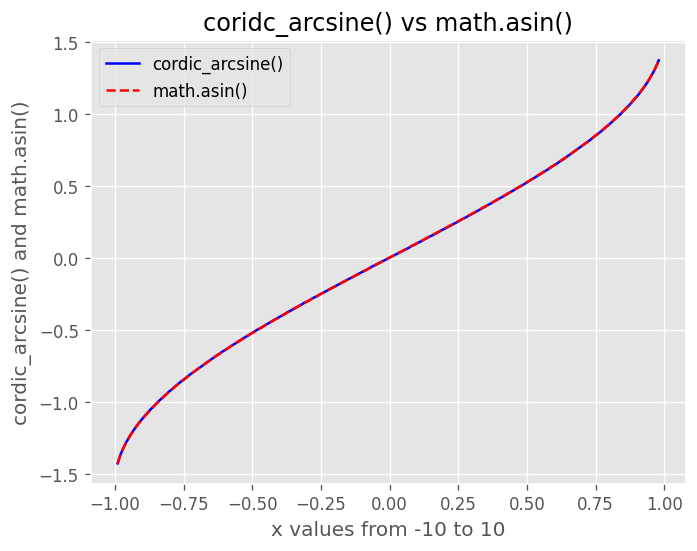

In [33]:
# generate x and y values
xlist = np.arange(-0.99,0.99,0.01) 
ylist_cordic_arcsine = [cordic_arcsine(x) for x in xlist]
ylist_math_arcsin = [math.asin(x) for x in xlist]

# plot graph
plt.figure(num = 0,dpi = 120)
plt.plot(xlist,ylist_cordic_arcsine, color = "blue", label = "cordic_arcsine()")
plt.plot(xlist,ylist_math_arcsin,color = "red", label = "math.asin()", linestyle = "dashed")
leg = plt.legend()
plt.xlabel("x values from -10 to 10")
plt.ylabel("cordic_arcsine() and math.asin()")
plt.title("coridc_arcsine() vs math.asin()")
plt.show()